In [ ]:
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit
from qiskit import QuantumCircuit

1. With Cirq

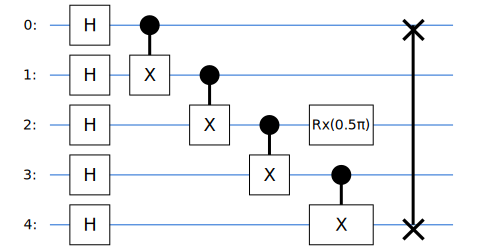

In [33]:
qubits = cirq.LineQubit.range(5)
circ = cirq.Circuit([
    cirq.H(qubits[0]),
    cirq.H(qubits[1]),
    cirq.H(qubits[2]),
    cirq.H(qubits[3]),
    cirq.H(qubits[4]),
    cirq.CNOT(qubits[0], qubits[1]),
    cirq.CNOT(qubits[1], qubits[2]),
    cirq.CNOT(qubits[2], qubits[3]),
    cirq.CNOT(qubits[3], qubits[4]),
    cirq.SWAP(qubits[0], qubits[4]),
    cirq.rx(np.pi/2)(qubits[2])
])
SVGCircuit(circ)

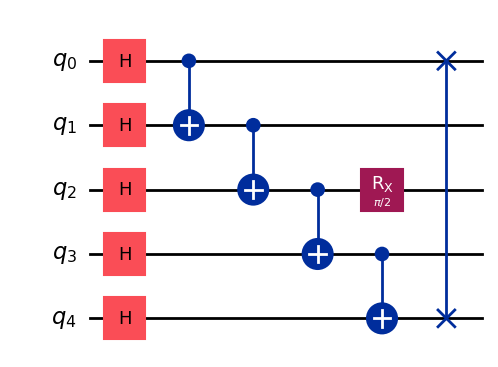

In [34]:
QuantumCircuit.from_qasm_str(circ.to_qasm()).draw('mpl')

2. In Cirq

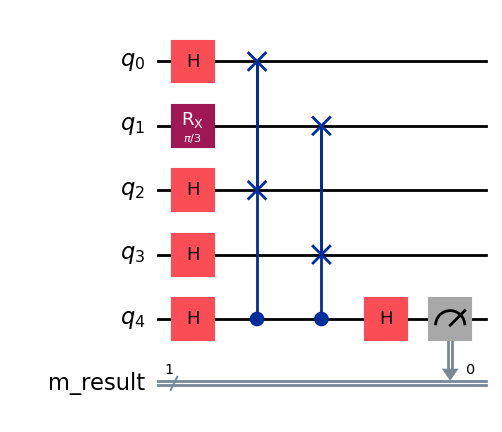

In [44]:
qubits = cirq.LineQubit.range(5)
circ = cirq.Circuit([
    cirq.H(qubits[0]),
    cirq.rx(np.pi/3)(qubits[1]),
    cirq.H(qubits[2]),
    cirq.H(qubits[3]),
    cirq.H(qubits[4]),
    cirq.CSWAP(qubits[4], qubits[0], qubits[2]), 
    cirq.CSWAP(qubits[4], qubits[1], qubits[3]),
    cirq.H(qubits[4]),
    cirq.measure(qubits[4], key='result')
])
QuantumCircuit.from_qasm_str(circ.to_qasm()).draw('mpl')

In [48]:
simulator = cirq.Simulator()
result = simulator.run(circ, repetitions=1000)
print("SWAP test result:",result.histogram(key='result'))
ans= 2*result.histogram(key='result')[0] / 1000 -1
print("State overlap=",ans)

SWAP test result: Counter({0: 766, 1: 234})
State overlap= 0.532
